In [43]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np

import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, ConfusionMatrixDisplay, mean_squared_error
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt



In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:

file_path = '/content/drive/MyDrive/dataframe1.csv'
df = pd.read_csv(file_path)

df.columns
df2 =df.drop(columns=['Date','High_Diff', 'High_Vol', 'High_PC_Price', 'High_PC_Vol'])



Index(['Date', 'PNL', 'STD_A', 'STD_B', 'STD_C', 'STD_D', 'STD_E', 'STD_F',
       'STD_G', 'STD_Sum', 'STD_Total', 'STD_Diff', 'Open_Vol',
       'Perc_Change_Vol', 'Perc_Change_Price', 'Volume', 'Open_Int', 'Range',
       'High_Diff', 'High_Vol', 'High_PC_Price', 'High_PC_Vol'],
      dtype='object')

divide the PNL to above the mean =1  and below the mean =0 

In [46]:
mean_PNL = df2.PNL.mean(axis = 0)
mean_PNL
df2["High_PNL"] = np.where(df2['PNL'] > mean_PNL, 1,0)
df2 = df2.drop(columns =['PNL'])


-2810.1987951807228

In [47]:
predictors = ['STD_A', 'STD_B', 'STD_C', 'STD_D', 'STD_E', 'STD_F',
       'STD_G', 'STD_Sum', 'STD_Total', 'STD_Diff', 'Open_Vol',
       'Perc_Change_Vol', 'Perc_Change_Price', 'Volume', 'Open_Int', 'Range']

In [48]:
train_df = df2[:258].copy() # First 258 rows as the training set (all of 2022)
test_df = df2[258:].copy()  # Remaining rows as the test set (2023 until May 1st)


KNeighborsClassifier(n_neighbors=1)

Correct Prediction Rate = 0.4595


KNeighborsClassifier(n_neighbors=2)

Correct Prediction Rate = 0.5135


KNeighborsClassifier(n_neighbors=3)

Correct Prediction Rate = 0.5270


KNeighborsClassifier()

Correct Prediction Rate = 0.4324


KNeighborsClassifier(n_neighbors=10)

Correct Prediction Rate = 0.3784


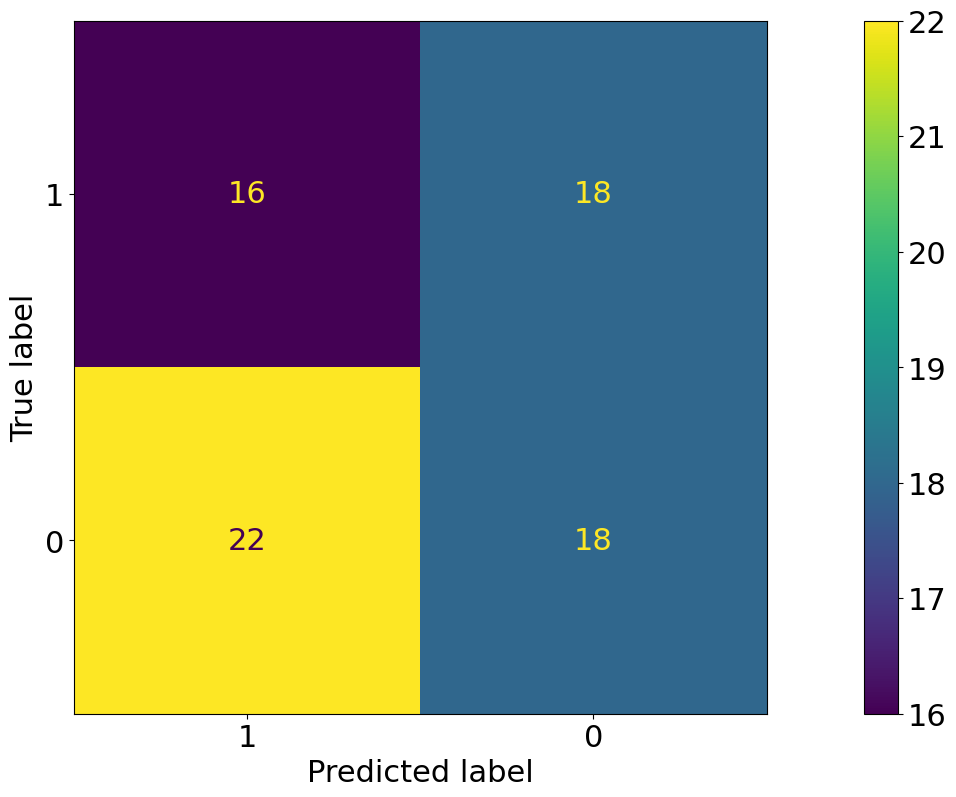

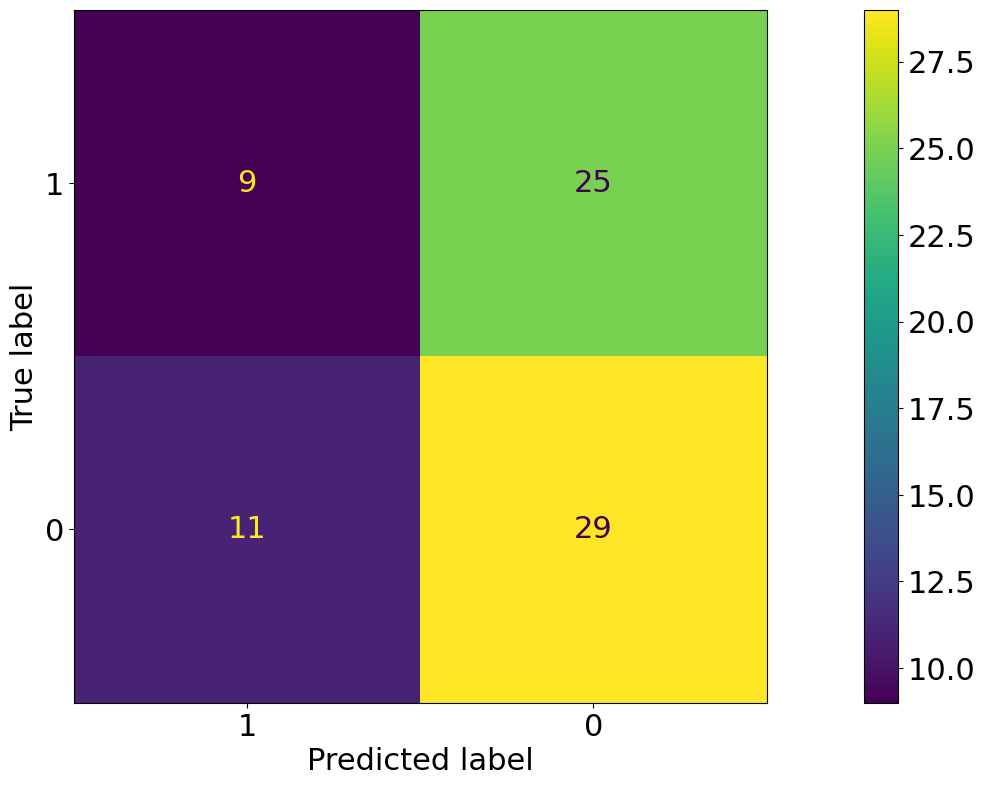

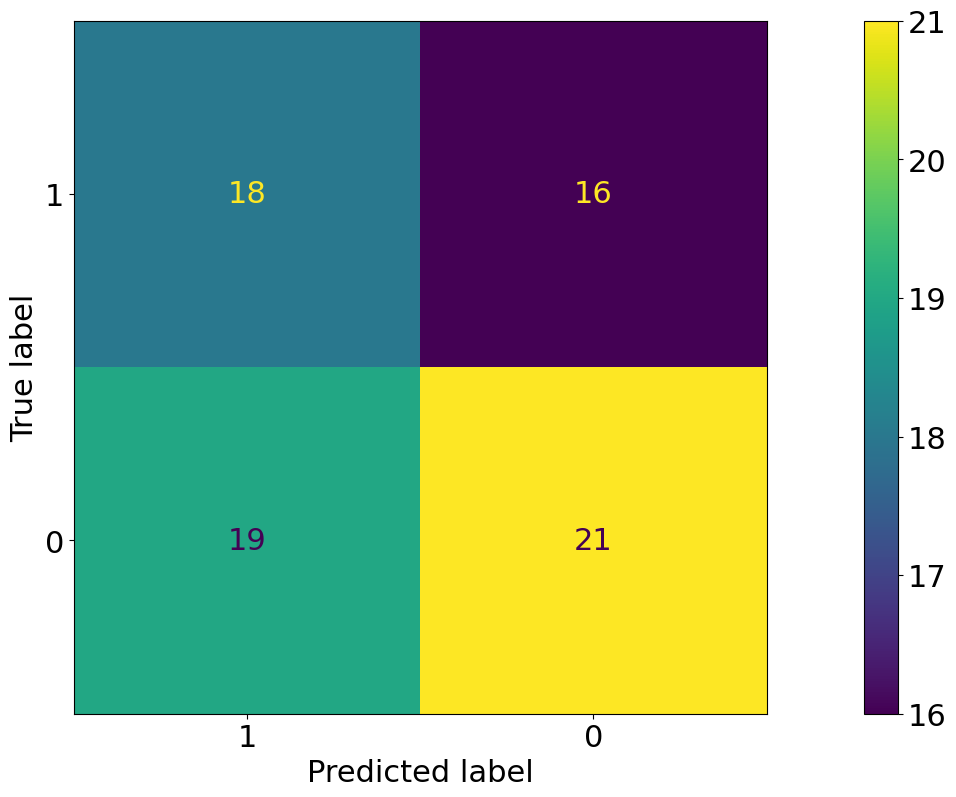

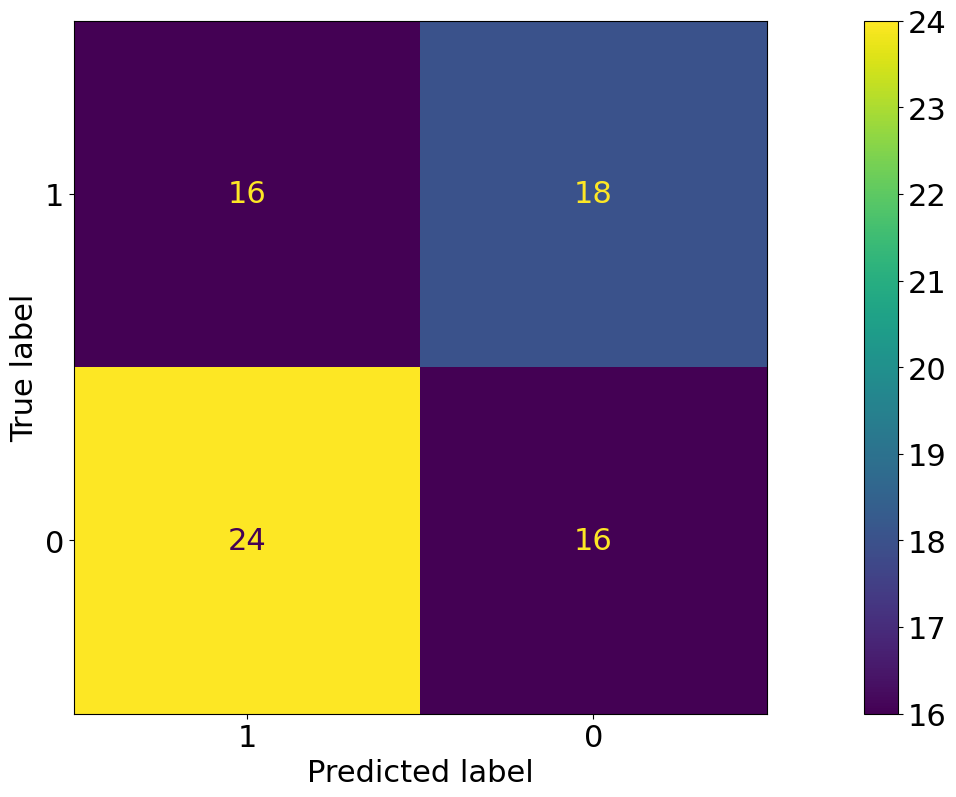

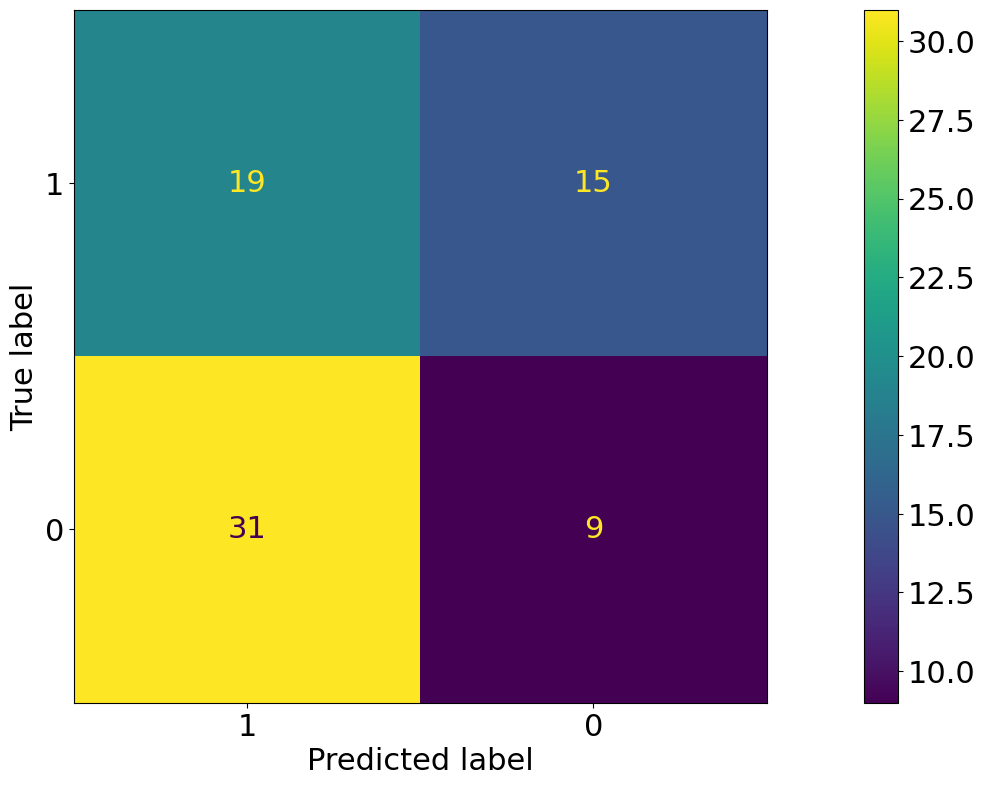

In [49]:
n_list = [1,2,3,5,10]
for n in n_list:
  model = neighbors.KNeighborsClassifier(n_neighbors = n)
  predictors = ['STD_A', 'STD_B', 'STD_C', 'STD_D', 'STD_E', 'STD_F',
        'STD_G', 'STD_Sum', 'STD_Total', 'STD_Diff', 'Open_Vol',
        'Perc_Change_Vol', 'Perc_Change_Price', 'Volume', 'Open_Int', 'Range']
  model.fit(train_df[predictors], train_df['High_PNL'])
  predictions = model.predict(test_df[predictors])
  cm = confusion_matrix(test_df['High_PNL'], predictions, labels=[1, 0])
  cmd = ConfusionMatrixDisplay(cm, display_labels=[1, 0])
  plt.rc('font', size = 22)
  print(f"Correct Prediction Rate = {(test_df['High_PNL'] == predictions).mean():.4f}")
  cmd.plot()
  